# Raices de funciones no lineales

## 1. Método de Ridder

El método de Ridder es funcional para encontrar raices de funciones no lineales. Este se apoya en métodos conocidos y de fácil compresión como Bisección y Regula Falsi. Utiliza Bisección para realizar una primera aproximación a la raíz en $f(x)$ denominando a ese valor como $x_3$ el cual será de utilidad para encontrar una función $g(x) = f(x)e^{hQ}$. Definiendo los puntos $(x_1, g(x_1)) = a$, $(x_2, g(x_2)) = b$ y $(x_3, g(x_3)) = c$ y la recta $R \in g(x)$. Se debe cumplir entonces:

* $a, b, c \in R$
* $g(x_3) = \frac{g(x_1) + g(x_2)}{2}$

Analizando a partir de las condiciones anteriores, la función $g(x)$ cumple lo siguiente: 
\begin{equation}
    g(x_1) = f(x_1)e^{0.Q}
    \label{g(x_1)}
\end{equation}
\begin{equation}
    g(x_2) = f(x_2)e^{2h.Q}
    \label{g(x_2)}
\end{equation}
\begin{equation}
    g(x_3) = f(x_3)e^{h.Q}
    \label{g(x_3)}
\end{equation}


Ya que la función $g(x)$ muestra una tendencia lineal en el intérvalo $[x_1, x_2]$ y dentro de este intérvalo existe una raíz real que se aproxima a la que buscamos en $f(x)$ se procede a aplicar Regula Falsi en $g(x)$ para encontrar un valor $x_4$ de la siguiente manera: 

\begin{equation}
    x_4 = x_3 - \frac{g(x_3)(x_3 - x_1)}{g(x_3) - g(x_1)}
    \label{root}
\end{equation}

Sustituyendo las expresiones \ref{g(x_1)}, \ref{g(x_2)} y \ref{g(x_3)} en \ref{root} para que quede en función de $f(x)$

\begin{equation}
    x_4 = x_3 \pm (x_3 - x_1) \frac{f(x_3)}{\sqrt{f^2(x_3) - f(x_1)f(x_2)}}
    \label{root2}
\end{equation}

La ecuación \ref{root2} es la que se implementará en el programa para encontrar la mejor aproximación en cada iteración.

### 1.1 Ejemplo práctico

Encontrar mediante el método de Ridder la raíz de la función $f(x) = 1/2 - cos(x)$ con una tolerancia de $1x10^{-9}$ para el error absoluto, tal que $x \in [0, \pi]$ 
Definimos la función y el intérvalo inicial:

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a0 = 0
b0 = math.pi
c0 = (a0 + b0)/2
f0 = lambda x: x**2 -2
TOL = 1e-9
table = {"n":[],
        "a":[],
        "b":[],
        "f(a)":[],
        "f(b)":[],
        "c":[],
        "f(c)":[],
        "f(a)-f(b)":[],
        "d":[],
        "f(d)":[],
        "ERROR":[]}

##### 1.1 Algoritmo del método de Ridder 

In [2]:
def ridder (f, a, b, TOL):
    c = 0.5 * (a + b)
    oldRoot = c
    n = 1
    
    while True:
        # Realizando iteración del método
        c = 0.5 * (a + b)
        s = math.sqrt(f(c)**2-f(a)*f(b))
        if s == 0:
            d = c
            break
            
        if f(a) - f(b) > 0:
            d = c+(c-a)*f(c)/math.sqrt(f(c)**2-f(a)*f(b))
        else:
            d = c-(c-a)*f(c)/math.sqrt(f(c)**2-f(a)*f(b))
        
        # Guardando datos de cada iteración en una tabla
        table["n"].append(n)
        table["a"].append(a)
        table["b"].append(b)
        table["f(a)"].append(f(a))
        table["f(b)"].append(f(b))
        table["c"].append(c)
        table["f(c)"].append(f(c))
        table["f(a)-f(b)"].append(f(a)-f(b))
        table["d"].append(d)
        table["f(d)"].append(f(d))
        table["ERROR"].append(abs(oldRoot-d))
              
        # Encontrando el nuevo intérvalo
        if f(c) * f(d) <= 0:
            if c < d: 
                a = c
                b = d
            else:
                a = d
                b = c
        else:
            if f(b) * f(d) < 0:
                a = d
            else: 
                b = d
        
        # Evaluando error
        if abs(oldRoot - d) <= TOL:
            break
        oldRoot = d
        n+=1
        
            
    return d

Al tener ya definido el intérvalo y la función a utilizar solamente queda como último paso el llamar la función ridder con los parámetros necesarios, en este caso: f, a, b, TOL

In [3]:
ridder(f0, a0, b0, TOL)

1.4142135623730951

### 1.2 Visualización de iteraciones
Si deseamos ver los valores que se obtienen con cada iteración entonces lo podemos visualizar con el siguiente código:

In [4]:
df = pd.DataFrame(table)
display(df)

,n,a,b,f(a),f(b),c,f(c),f(a)-f(b),d,f(d),ERROR
0,1,0.000000,3.141593,-2.000000e+00,7.869604,1.570796,0.467401,-9.869604,1.387005,-7.621692e-02,1.837913e-01
1,2,1.387005,1.570796,-7.621692e-02,0.467401,1.478901,0.187147,-0.543618,1.414197,-4.658149e-05,2.719202e-02
2,3,1.414197,1.478901,-4.658149e-05,0.187147,1.446549,0.092504,-0.187194,1.414214,-5.952750e-09,1.646704e-05
3,4,1.414214,1.446549,-5.952750e-09,0.092504,1.430381,0.045990,-0.092504,1.414214,-1.925127e-13,2.104547e-09
4,5,1.414214,1.430381,-1.925127e-13,0.045990,1.422297,0.022930,-0.045990,1.414214,4.440892e-16,6.816769e-14


### 1.3 Gráficas de funciones
#### 1.3.1 Encontrar factor $e^{hQ}$
Para entender de una mejor manera cómo funciona el método, visualicemos las gráficas de ambas funciones: $f(x)$ y $g(x)$.
Primero, para encontrar $g(x)$ debemos encontrar el factor $e^{hQ}$ por medio de las ecuaciones \ref{g(x_1)}, \ref{g(x_2)}, y \ref{g(x_3)}, y la restricción $g(x_3) = \frac{g(x_1) + g(x_2)}{2}$, obteniendo la siguiente expresión: 

\begin{equation}
    e^{hQ} = \frac{f(x_3) \pm \sqrt{f^2(x_3) - f(x_2)f(x_1)}}{f(x_2)}
    \label{k}
\end{equation}


In [5]:
def exponentialFactor (f, a, b, c):
    k = (f(c) + np.sign(f(b))*math.sqrt(f(c)**2 - f(a)*f(b)))/f(b)
    return k
exponentialFactor(f0, a0, b0, c0)

0.5670052067191976

#### 1.3.2 Encontrar recta interpolada
En segundo lugar, al haber encontrado el factor $e^{hQ}$ encontramos la recta $g(x)$ por medio de los puntos $(x_1, f(x_1))$, $(x_2, f(x_2)e^{2hQ})$, $(x_3, f(x_3)e^{hQ})$. En este paso se pueden aplicar diferentes métodos de interpolación como el polinmio interpolante de Lagrange, diferencias divididas de Newton, interpolación lineal, entre otros. Como se busca que los puntos anteriores sean colineales, al utilizar interpolación lineal obtendremos una buena aproximación de la función que buscamos.

In [6]:
k = exponentialFactor(f0, a0, b0, c0)

# Using linear interpolation between a and b
g0 = lambda x: ((f0(b0)*k**2 - f0(a0))/(b0-a0))*(x-c0) + f0(c0)*k
print("g(x) = ", (f0(b0)*k**2 - f0(a0))/(b0-a0), "(x -", c0, ")", "+", f0(c0)*k)

g(x) =  1.4419557894576411 (x - 1.5707963267948966 ) + 0.26501885748069826


Como útlimo paso debemos evaluar si esta función cumple con las restricciones necesarias. Para ello se evalúa en la ecuación 
\begin{equation}
    f(x_1) - 2f(x_3)e^{hQ} + f(b)e^{2hQ} = 0
\end{equation}

In [7]:
# Evaluating wether if g(x) satisfies the first constraint
if f0(a0)-2*f0(c0)*k+f0(b0)*k**2 == 0:
    print ('Sí cumple')
else:
    print ('No cumple')

print("Resultado: ", f0(a0)-2*f0(c0)*k+f0(b0)*k**2)

No cumple
Resultado:  -4.440892098500626e-16


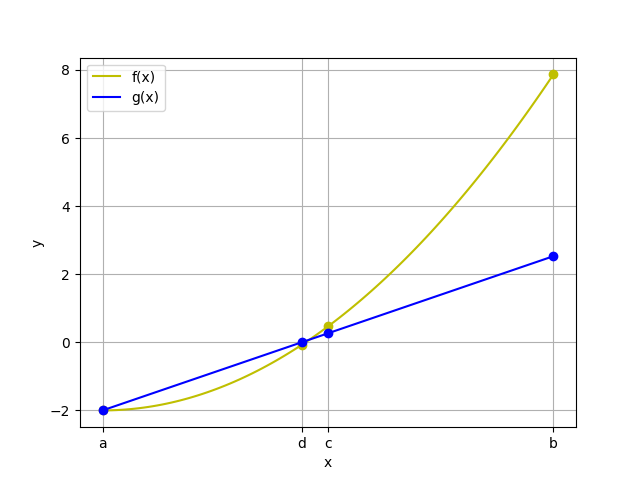

In [8]:
x = np.linspace(a0, b0, 100)
d0 = c0-(c0-a0)*f0(c0)/math.sqrt(f0(c0)**2-f0(a0)*f0(b0)) # first iteration

plt.plot(x, [f0(i) for i in x], label = 'f(x)', color = 'y')
plt.plot([a0, b0, c0, d0],[f0(a0), f0(b0), f0(c0), f0(d0)], 'o', color = 'y')
plt.plot(x, [g0(i) for i in x], label = 'g(x)', color = 'b')
plt.plot([a0, b0, c0, d0], [g0(a0), g0(b0), g0(c0), g0(d0)], 'o', color = 'b')
plt.legend(loc = 'upper left')
plt.xticks([a0, b0, c0, d0], ['a', 'b', 'c', 'd'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 1.4 Análisis del error

#### 1.4.1 Constante asintótica del error
Como ya se sabe, el error absoluto de los métodos numéricos se puede encontrar por medio de la siguiente ecuación: 
\begin{equation}
\Delta x_{k+1} = c(\Delta x_k)^p
\end{equation}
\begin{equation}
0 < c < 1
\end{equation}
\begin{equation}
p > 1
\end{equation}
Siendo $c$ la constante asintótica del error, y $p$ el orden de convergencia del método. Para poder analizar el error en el caso particular de $f(x) = 1/2 - cos(x)$ debemos encontrar $c$. Esta constante la podemos encontrar con el siguiente código, tomando el orden de convergencia de $p = \sqrt{2}$

In [9]:
length = len(table["ERROR"])
sum = 0

table2 = {"n":["0"],
    "constante asintótica": ["nan"]}

print("Constante asintótica del error por iteración")
for i in range(0, length-1):
    l0 = table["ERROR"][i+1]/(table["ERROR"][i])**math.sqrt(2) # Asymptotic error constant
    table2["constante asintótica"].append(l0)
    table2["n"].append(i+1)
    sum += l0
    
avg = sum / (length - 1) # Calculating average for the asymptotic error constant

df2 = pd.DataFrame(table2)
display(df2)
print("---------------------------------------------------")
print("Promedio de la constante: ", avg)

Constante asintótica del error por iteración


,n,constante asintótica
0,0,nan
1,1,0.298431
2,2,0.002696
3,3,0.012243
4,4,0.127199


---------------------------------------------------
Promedio de la constante:  0.11014212589658615


#### 1.4.2 Generalización del error en términos de $|P_{0} - P|$
Para generar una función del error para el método, esta depende del orden de convergencia. Si tomamos que el método converge cuadráticamente, el error cometido en cada iteración estará dado por la ecuación
\begin{equation}
|P_n - P| = \lambda^{2^n -1}(|P_0 - P|)^{2^n}
\end{equation}
Por otro lado, si consideramos que el método converge con un orden de $\sqrt(2)$, la ecuación del error sería la siguiente:

Para iteraciones pares
\begin{equation}
|P_n - P| = \lambda^{(2^{\frac{n}{2}}-1)(\sqrt{2}+1)}(|P_0 - P|)^{2^{\frac{n}{4}}}
\end{equation}
Para iteraciones impares
\begin{equation}
|P_n - P| = \lambda^{2^{\frac{n+3}{2}}-\sqrt{2}-1}(|P_0 - P|)^{2^{\frac{n+1}{4}}}
\end{equation}

Visualicemos cada uno de los casos con la constante asintótica del error que acabamos de encontrar para el caso particular de $f(x)$ a continuación

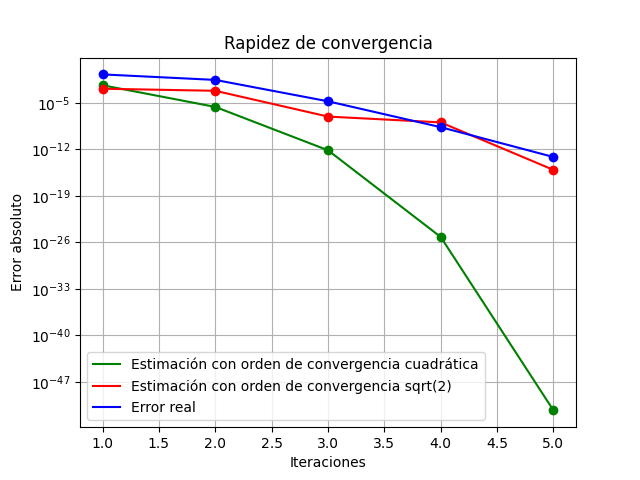

In [10]:
# Taking ridder as a quadratic order of convergence algorithm
e = lambda n: l0**(2**n-1)*(table["ERROR"][0])**2**n

# Taking ridder as a sqrt(2) order of convergence algorithm
def error (n):
    if n % 2 == 0:
        return l0**((2**(n/2)-1)*(math.sqrt(2)+1))*(table["ERROR"][0])**(2**(n/4))
    else:
        return l0**(2**((n+3)/2)-math.sqrt(2)-1)*(table["ERROR"][0])**(2**((n+3)/4))
    
    
plt.plot(table["n"], [e(i) for i in table["n"]], label="Estimación con orden de convergencia cuadrática", color="green")
plt.plot(table["n"], [e(i) for i in table["n"]], 'o', color="green")
plt.plot(table["n"], [error(i) for i in table["n"]], label="Estimación con orden de convergencia sqrt(2)", color="red")
plt.plot(table["n"], [error(i) for i in table["n"]], 'o', color="red")
plt.plot(table["n"], table["ERROR"], label="Error real", color="blue")
plt.plot(table["n"], table["ERROR"], 'o', color="blue")
plt.legend(loc = "lower left")
plt.grid()
plt.title("Rapidez de convergencia")
plt.xlabel("Iteraciones")
plt.ylabel("Error absoluto")
plt.yscale("log")
plt.show()

## 1.5 Más ejemplos prácticos

Encontrar la solución a la ecuación $1/x - x^3 = 0$ tal que $x \in [1/2, 2]$ con una tolerancia de error absoluto de $1x10^{-12}$

In [43]:
a1 = 1/2
b1 = 2
c1 = (a1 + b1)*0.5
f1 = lambda x: 1/x - x**3
TOL = 1e-12
table = {"n":[],
        "a":[],
        "b":[],
        "f(a)":[],
        "f(b)":[],
        "c":[],
        "f(c)":[],
        "f(a)-f(b)":[],
        "d":[],
        "f(d)":[],
        "ERROR":[]}
ridder(f1, a1, b1, TOL)

1.0

In [44]:
df = pd.DataFrame(table)
display(df)

,n,a,b,f(a),f(b),c,f(c),f(a)-f(b),d,f(d),ERROR
0,1,0.500000,2.000000,1.875000e+00,-7.500000,1.250000,-1.153125e+00,9.375000,1.029562,-1.200449e-01,2.204384e-01
1,2,0.500000,1.029562,1.875000e+00,-0.120045,0.764781,8.602519e-01,1.995045,0.996639,1.342258e-02,3.292283e-02
2,3,0.996639,1.029562,1.342258e-02,-0.120045,1.013100,-5.274825e-02,0.133467,1.000000,-1.861211e-06,3.361740e-03
3,4,0.996639,1.000000,1.342258e-02,-0.000002,0.998320,6.715982e-03,0.013424,1.000000,3.966605e-12,4.653037e-07
4,5,1.000000,1.000000,3.966605e-12,-0.000002,1.000000,-9.306035e-07,0.000002,1.000000,0.000000e+00,9.916512e-13


In [45]:
k = exponentialFactor(f1, a1, b1, c1)

# Using linear interpolation between a and b
g1 = lambda x: ((f1(b1)*k**2 - f1(a1))/(b1-a1))*(x-c1) + f1(c1)*k
print("g(x) = ", (f1(b1)*k**2 - f1(a1))/(b1-a1), "(x -", c1, ")", "+", f1(c1)*k)

g(x) =  -3.5406648879774316 (x - 1.25 ) + -0.7804986659830736


In [46]:
# Evaluating wether if g(x) satisfies the first constraint
if f1(a1)-2*f1(c1)*k+f1(b1)*k**2 == 0:
    print ('Sí cumple')
else:
    print ('No cumple')

print("Resultado: ", f1(a1)-2*f1(c1)*k+f1(b1)*k**2)

Sí cumple
Resultado:  0.0


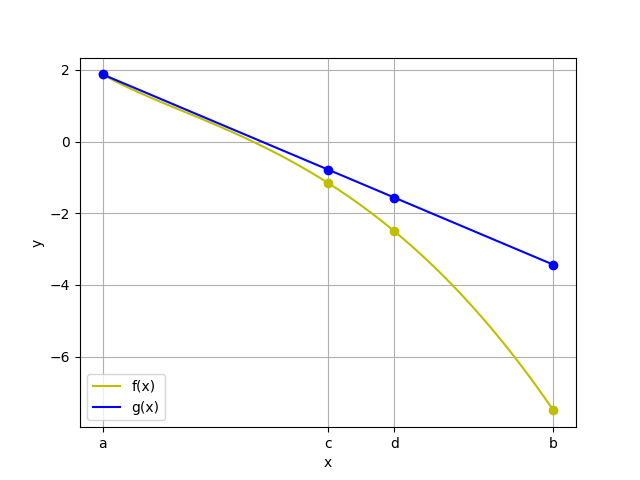

In [50]:
x = np.linspace(a1, b1, 100)
d1 = c1-(c1-a1)*f1(c1)/math.sqrt(f1(c1)**2-f1(a1)*f1(b1)) # first iteration

plt.plot(x, [f1(i) for i in x], label = 'f(x)', color = 'y')
plt.plot([a1, b1, c1, d1],[f1(a1), f1(b1), f1(c1), f1(d1)], 'o', color = 'y')
plt.plot(x, [g1(i) for i in x], label = 'g(x)', color = 'b')
plt.plot([a1, b1, c1, d1], [g1(a1), g1(b1), g1(c1), g1(d1)], 'o', color = 'b')
plt.legend(loc = 'lower left')
plt.xticks([a1, b1, c1, d1], ['a', 'b', 'c', 'd'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [48]:
length = len(table["ERROR"])
sum = 0

table2 = {"n":["0"],
    "constante asintótica": ["nan"]}

print("Constante asintótica del error por iteración")
for i in range(0, length-1):
    l1 = table["ERROR"][i+1]/(table["ERROR"][i])**math.sqrt(2) # Asymptotic error constant
    table2["constante asintótica"].append(l1)
    table2["n"].append(i+1)
    sum += l1
    
avg = sum / (length - 1) # Calculating average for the asymptotic error constant

df2 = pd.DataFrame(table2)
display(df2)
print("---------------------------------------------------")
print("Promedio de la constante: ", avg)

Constante asintótica del error por iteración


,n,constante asintótica
0,0,nan
1,1,0.279402
2,2,0.419894
3,3,0.001465
4,4,0.000894


---------------------------------------------------
Promedio de la constante:  0.17541370751818935


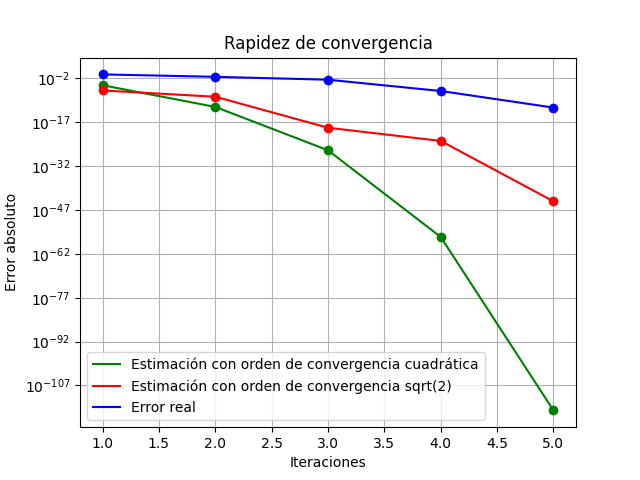

In [49]:
# Taking ridder as a quadratic order of convergence algorithm
e = lambda n: l1**(2**n-1)*(table["ERROR"][0])**2**n

# Taking ridder as a sqrt(2) order of convergence algorithm
def error (n):
    if n % 2 == 0:
        return l1**((2**(n/2)-1)*(math.sqrt(2)+1))*(table["ERROR"][0])**(2**(n/4))
    else:
        return l1**(2**((n+3)/2)-math.sqrt(2)-1)*(table["ERROR"][0])**(2**((n+3)/4))
    
    
plt.plot(table["n"], [e(i) for i in table["n"]], label="Estimación con orden de convergencia cuadrática", color="green")
plt.plot(table["n"], [e(i) for i in table["n"]], 'o', color="green")
plt.plot(table["n"], [error(i) for i in table["n"]], label="Estimación con orden de convergencia sqrt(2)", color="red")
plt.plot(table["n"], [error(i) for i in table["n"]], 'o', color="red")
plt.plot(table["n"], table["ERROR"], label="Error real", color="blue")
plt.plot(table["n"], table["ERROR"], 'o', color="blue")
plt.legend(loc = "lower left")
plt.grid()
plt.title("Rapidez de convergencia")
plt.xlabel("Iteraciones")
plt.ylabel("Error absoluto")
plt.yscale("log")
plt.show()